<a href="https://colab.research.google.com/github/Asha629399/DL_ASSIGNMENT_1_CS22M021/blob/main/Copy_of_Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#To install wandb package ,which is helpful in generating plots and report.
!pip install wandb

In [ ]:
!touch requirements.txt

wandb

wandb


In [ ]:
!cat requirements.txt

In [ ]:
!pip install -r requirements.txt

keras==2.11.0
tensorflow==2.11.0
numpy==1.18.*


In [ ]:
# Packages that were required
#!pip install tensorflow==2.11.0

#!pip install keras==2.11.0
#!pip install numpy==1.18.*
#!pip install --upgrade tensorflow keras
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.datasets import fashion_mnist
from numpy import random
from random import seed
import math

from tensorflow.keras.datasets import mnist
import wandb

np.seterr(divide='ignore', invalid='ignore')

In [ ]:
 #The tand MNIST dataset , and splitting the dataset into test(10000 pts) and train(60000 pts)
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [ ]:
# Splitting the train data set into train(54000) and cross_validation(6000) dataset

x_val = x_train[54000:]
y_val = y_train[54000:]
x_train = x_train[:54000]
y_train = y_train[:54000]

In [ ]:
print("train images shape:", x_train.shape)
print("train labels shape:", y_train.shape)
print("validation images shape:", x_val.shape)
print("validation images shape:", y_val.shape)
print("test images shape:", x_test.shape)
print("test images shape:", y_test.shape)
print(y_train)

train images shape: (54000, 28, 28)
train labels shape: (54000,)
validation images shape: (6000, 28, 28)
validation images shape: (6000,)
test images shape: (10000, 28, 28)
test images shape: (10000,)
[9 0 0 ... 5 3 9]


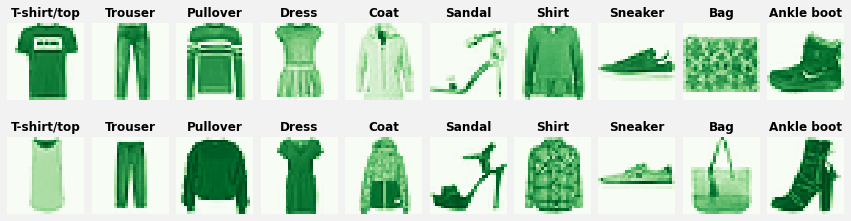

In [ ]:
# Define the number of rows and columns in the grid
n_rows = 2
n_cols = 10

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Create a figure with the appropriate size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4))

# Loop over the axes and plot an image for each class
for i, ax in enumerate(axes.flat):
    class_images = x_train[y_train == i % 10]
    img = class_images[i // 10]
    ax.imshow(img, cmap='Greens', interpolation='nearest')
    ax.set_title(class_names[i % 10], fontsize=12, fontweight='bold')
    ax.axis('off')

# Add some spacing between the subplots
fig.subplots_adjust(wspace=0.1, hspace=0.1)

# Set the background color of the figure
fig.patch.set_facecolor('#F2F2F2')

# Display the figure
plt.show()

In [ ]:
def log_images(x_train,y_train):
  set_images = []
  count = 0
  for image,label in zip(x_train,y_train):
    if label < 10:
      set_images.append(wandb.Image(image,caption=class_names[label]))
      count+=1
    else:
      break
  wandb.log({"Images":set_images})



In [ ]:
#import os
#import wandb
#wandb.login()

wandb.init(project="DL_Assignment1")

In [ ]:
log_images(x_train, y_train)

In [ ]:
# turn the data into an appropriate matrix form
x_train = np.reshape(x_train, (54000, 784, 1))
y_train = np.reshape(y_train, (54000, 1))


In [ ]:
y_train = np.reshape(y_train, (54000, 1))

In [ ]:
x_test = np.reshape(x_test, (10000, 784, 1))
y_test = np.reshape(y_test, (10000, 1))

In [ ]:
x_val = np.reshape(x_val, (6000, 784, 1))
y_val = np.reshape(y_val, (6000, 1))

In [ ]:
# One-hot encoding
targs = np.zeros((54000, 10, 1))
for i in range(54000):
    targs[i][y_train[i][0]-1][0] = 1 # preparing the target matrix 

In [ ]:
targs_test = np.zeros((10000, 10, 1))
for i in range(10000):
    targs_test[i][y_test[i][0]-1][0] = 1 # preparing the target matrix 

In [ ]:
targs_val = np.zeros((6000, 10, 1))
for i in range(6000):
    targs_val[i][y_val[i][0]-1][0] = 1 # preparing the target matrix 

In [ ]:
# normalize data
x_train = x_train / 255
x_test = x_test / 255
x_val = x_val / 255

In [ ]:
def initialize_network(nInputs, nHidden, nOutputs, nLayers, config):
    """
    Initializes a neural network with given number of inputs, hidden layers, and outputs.

    :param nInputs: Number of input neurons.
    :param nHidden: Number of neurons in each hidden layer.
    :param nOutputs: Number of output neurons.
    :param nLayers: Number of hidden layers.
    :param config: Configuration object with hyperparameters.
    :return: A list of dictionaries containing the weights and biases for each layer of the network.
    """
    network = []

    # Initialize weights and biases for the first hidden layer
    if config.initialization == "random":
        weights = 0.01 * np.random.randn(nHidden, nInputs)
    else:
        weights = 0.01 * np.random.randn(nHidden, nInputs)
        if config.activation == "relu":
            weights *= np.sqrt(2 / nInputs)
        else:
            weights *= np.sqrt(1 / nInputs)
    bias = np.zeros([nHidden, 1])
    network.append({'weights': weights, 'bias': bias})

    # Initialize weights and biases for remaining hidden layers
    for i in range(nLayers - 1):
        if config.initialization == "random":
            weights = 0.01 * np.random.randn(nHidden, nHidden)
        else:
            weights = 0.01 * np.random.randn(nHidden, nHidden)
            if config.activation == "relu":
                weights *= np.sqrt(2 / nHidden)
            else:
                weights *= np.sqrt(1 / nHidden)
        bias = np.zeros([nHidden, 1])
        network.append({'weights': weights, 'bias': bias})

    # Initialize weights and biases for the output layer
    if config.initialization == "random":
        weights = 0.01 * np.random.randn(nOutputs, nHidden)
    else:
        weights = 0.01 * np.random.randn(nOutputs, nHidden)
        if config.activation == "relu":
            weights *= np.sqrt(2 / nHidden)
        else:
            weights *= np.sqrt(1 / nHidden)
    bias = np.zeros([nOutputs, 1])
    network.append({'weights': weights, 'bias': bias})

    return network

In [ ]:
### Activation Functions starts

def sigmoid(Z):
    B = (1 + np.exp(-Z))
    A = 1/B
    return A

def sigmoid_gradient(dA, prev_Z):
    s = sigmoid(prev_Z)
    C =  s * (1 - s)
    dZ = dA*C
    return dZ

def relu(Z):
    A = np.maximum(0, Z)
    return A
    
def relu_gradient(dA, prev_Z):
    s = np.maximum(0, prev_Z)
    D = (s>0) * 1 
    dZ = D*dA
    return dZ 

def tanh(Z):
    A = np.tanh(Z)
    return A

def tanh_gradient(dA, prev_Z):
    s = np.tanh(prev_Z)
    dZ = (1 - s**2) * dA
    return dZ

def linear(Z):
    return Z
 #softmax function for probability distribution
def softmax_function(Z):
    expZ = np.exp(Z - np.max(Z))
    return expZ / expZ.sum(axis=0, keepdims=True)

def squared_error_loss(Y, A):
    m = Y.shape[1]
    loss = np.square(Y - A)
    cost = 1 / (2 * m) * np.sum(loss)
    return np.squeeze(cost)
### Activation Functions ends

In [ ]:
# Define dictionary to map activation names to functions
activation_functions = {
    'sigmoid': (sigmoid, sigmoid_gradient),
    'tanh': (tanh, tanh_gradient),
    'relu': (relu, relu_gradient)
}

# Define function to set activation functions
def set_Activation_Functions(activation_name):
    global activation_forward, activation_backward

    if activation_name in activation_functions:
        activation_forward, activation_backward = activation_functions[activation_name]
        print(f"Activation function set to {activation_name}")
    else:
        print("Invalid activation name")

# Initialize activationForward and activationBackward to None
activation_forward = None
activation_backward = None

In [ ]:
# Initializing loss as None
loss = None

# Function to set loss activation functions
def set_loss_function(loss_function):
    global loss
    
    if loss_function == 'crossEntropy':
        loss = 'crossEntropy'
    else:
        loss= 'squaredError'

In [ ]:
def evaluate_model_performance(network, config, x_train, targs, x_val, targs_val, x_test, targs_test, epoch, total_cost):
    epoch += 1
    total_cost_val = 0
    for ins, target in zip(x_val, targs_val):
        A = forward_propagate(network, ins)
        total_cost_val += squared_error_loss(target, A)

    accuracy_train = printAccuracy(network, x_train, targs)
    accuracy_val = printAccuracy(network, x_val, targs_val)
    accuracy_test = printAccuracy(network, x_test, targs_test)
    total_cost /= len(x_train)
    total_cost_val /= len(x_val)

    wandb.log({
        "epoch": epoch,
        "train_loss": total_cost,
        "train_accuracy": accuracy_train,
        "val_loss": total_cost_val,
        "val_accuracy": accuracy_val,
        "test_accuracy": accuracy_test,
        "training_examples": len(x_train),
        "validation_examples": len(x_val),
        "test_examples": len(x_test),
        "learning_rate": config['learning_rate']
    })

In [ ]:
def printAccuracy(network, x_test, targs_test):
    predicted = [np.argmax(forward_propagate(network, x), axis=0) for x in x_test]
    actual = [np.argmax(y, axis=0) for y in targs_test]
    correct = sum([1 for p, a in zip(predicted, actual) if p == a])
    total = len(x_test)
    accuracy = correct / total
    print('Accuracy: ', accuracy)
    return accuracy

In [ ]:
#to print plot of confusion matrix
def predict_label(network, x_test, targs_test, y_test):
    classPredicted = []
    classActual = []

    for n in range(len(x_test)):
        ins = x_test[n]
        A = forward_propagate(network, ins)
        maxProbabilityPredicted = np.argmax(A, axis=0)[0]
        classPredicted.append((maxProbabilityPredicted)%10)
        classActual.append(np.argmax(targs_test[n], axis=0)[0])

    # Log the confusion matrix in WandB
    wandb.log({"conf_mat": wandb.plot.confusion_matrix(
        y_true=classActual, preds=classPredicted, class_names=class_names)})

    return classPredicted, classActual

In [ ]:
def reset_weights_and_gradients(network):
    for layer in network:
        weight_shape = layer['weights'].shape
        layer['delta_weights'] = np.zeros(weight_shape)
        bias_shape = layer['bias'].shape
        layer['delta_bias'] = np.zeros(bias_shape)

def initialize_velocity(network):
    for layer in network:
        weight_shape = layer['weights'].shape
        layer['velocity_weights'] = np.zeros(weight_shape)
        bias_shape = layer['bias'].shape
        layer['velocity_bias'] = np.zeros(bias_shape)

def update_velocity(network, gamma):
    for layer in network:
        layer['velocity_weights'] = gamma * layer['prev_velocity_weights']
        layer['velocity_bias'] = gamma * layer['prev_velocity_bias']

def initialize_previous_velocity(network):
    for layer in network:
        weight_shape = layer['weights'].shape
        layer['prev_velocity_weights'] = np.zeros(weight_shape)
        bias_shape = layer['bias'].shape
        layer['prev_velocity_bias'] = np.zeros(bias_shape)

In [ ]:
def forward_propagate(network, X):
    """
    Perform forward propagation through a neural network.

    Args:
        network (list): A list of dictionaries representing each layer in the network.
        X (numpy array): An input to the network.

    Returns:
        numpy array: The output of the network.
    """
    # Make a copy of the input
    x = np.copy(X)

    # Forward propagate through all layers
    for layer in network:
        Z = np.dot(layer['weights'], x) + layer['bias']
        layer.update({'prev_Z': Z, 'prev_A' : x})
        x = activation_forward(Z)

    # Return the output of the network
    return softmax_function(Z)

In [ ]:
# Back propagation
def back_propagation(network, actual, predicted):
    
    global loss
    
    if loss=="crossEntropy":
        dZ = -(actual - predicted)
    else:
        # Calculate the label with highest probability
        y_label = predicted[np.argmax(actual)]
        
        error = actual-predicted
        # Calculate the derivative of the cost function
        dZ = 2 * (y_label - 1) * y_label * error

    # Backward pass through the network
    for i in range(len(network) - 1, -1, -1):
        # Calculate the number of examples in the batch
        m = network[i]['prev_A'].shape[1]
        # Calculate the gradients of the weights and biases
        network[i]['delta_weights'] +=  1 / m * np.dot(dZ, network[i]['prev_A'].T)
        network[i]['delta_bias'] +=  1 / m * np.sum(dZ, axis=1, keepdims=True)
        # Calculate the derivative of the activation function
        prev_dA = np.dot(network[i]['weights'].T, dZ)
        if i != 0:
            # Calculate the derivative of the input to the activation function
            dZ = sigmoid_gradient(prev_dA, network[i-1]['prev_Z'])

In [ ]:
def update(network, learning_rate):
    for layer in network:
        layer['weights'] = layer['weights'] - learning_rate * layer['delta_weights']
        layer['bias'] = layer['bias'] - learning_rate * layer['delta_bias']

In [ ]:
#Optimiser function for stohastic gradient descent.

def optimser_sgd(network, config, x_train, targs, x_val, targs_val, x_test, targs_test):
    set_Activation_Functions(config.activation)
    for epoch in range(config.number_of_epochs):
        total_cost = 0
        # Reset accumulated db and dW before each epoch
        reset_weights_and_gradients(network)
        for n in range(0, len(x_train), config.batch_size):
            # Get batch of input and target values
            ins = x_train[n:n+config.batch_size]
            target = targs[n:n+config.batch_size]
            batch_size = len(ins)
            no_of_steps = 0
            for i in range(batch_size):
                # Perform forward propagation for each input value in the batch
                A = forward_propagate(network, ins[i])
                back_propagation(network, target[i], A)
                no_of_steps += 1
                # After a given batch, update the weights and bias in every layer
                if no_of_steps % batch_size == 0:
                    update(network, config.learning_rate / batch_size)
                    reset_weights_and_gradients(network)
                    no_of_steps = 0
                # Compute total cost for the batch
                total_cost += squared_error_loss(target[i], A)
        print('Total loss for this epoch: ', total_cost)
        if epoch == 4:
            evaluate_model_performance(network, config, x_train, targs, x_val, targs_val, x_test, targs_test, epoch, total_cost)

    evaluate_model_performance(network, config, x_train, targs, x_val, targs_val, x_test, targs_test, epoch, total_cost)
      

In [ ]:
# Back propagation for mgd
def back_propagation_mgd(network, actual, predicted):
    global loss
    
    if loss=="crossEntropy":
        dZ = -(actual - predicted)
    else:
        # Calculate the label with highest probability
        y_label = predicted[np.argmax(actual)]
        
        error = actual-predicted
        # Calculate the derivative of the cost function
        dZ = 2 * (y_label - 1) * y_label * error

    # Backward pass through the network
    for i in range(len(network) - 1, -1, -1):
        # Calculate the number of examples in the batch
        m = network[i]['prev_A'].shape[1]
        # Calculate the gradients of the weights and biases
        network[i]['delta_weights'] +=  1 / m * np.dot(dZ, network[i]['prev_A'].T)
        network[i]['delta_bias'] +=  1 / m * np.sum(dZ, axis=1, keepdims=True)
        # Calculate the derivative of the activation function
        prev_dA = np.dot(network[i]['weights'].T, dZ)
        if i != 0:
            # Calculate the derivative of the input to the activation function
            dZ = sigmoid_gradient(prev_dA, network[i-1]['prev_Z'])

In [ ]:
def update_mgd(network, learning_rate, gamma):
    for layer in network:
        velocity_weights = gamma * layer['prev_velocity_weights'] + learning_rate * layer['delta_weights']
        velocity_bias = gamma * layer['prev_velocity_bias'] + learning_rate* layer['delta_bias']

        layer['weights'] = layer['weights'] - velocity_weights
        layer['bias'] = layer['bias'] - velocity_bias

        layer['prev_velocity_weights'] = velocity_weights
        layer['prev_velocity_bias'] = velocity_bias

In [ ]:
#Optimiser function for stohastic gradient descent.

def optimser_mgd(network, config, x_train, targs, x_val, targs_val, x_test, targs_test):
    set_Activation_Functions(config.activation)
    initialize_previous_velocity(network)
    for epoch in range(config.number_of_epochs):
        total_cost = 0
        # Reset accumulated db and dW before each epoch
        reset_weights_and_gradients(network)
        for n in range(0, len(x_train), config.batch_size):
            # Get batch of input and target values
            ins = x_train[n:n+config.batch_size]
            target = targs[n:n+config.batch_size]
            batch_size = len(ins)
            no_of_steps = 0
            for i in range(batch_size):
                # Perform forward propagation for each input value in the batch
                A = forward_propagate(network, ins[i])
                back_propagation_mgd(network, target[i], A)
                no_of_steps += 1
                # After a given batch, update the weights and bias in every layer
                if no_of_steps % batch_size == 0:
                    update_mgd(network, config.learning_rate / batch_size,gamma=0.9)
                    reset_weights_and_gradients(network)
                    no_of_steps = 0
                # Compute total cost for the batch
                total_cost += squared_error_loss(target[i], A)
        print('Total cost for this epoch: ', total_cost)
        if epoch == 4:
            evaluate_model_performance(network, config, x_train, targs, x_val, targs_val, x_test, targs_test, epoch, total_cost)

    evaluate_model_performance(network, config, x_train, targs, x_val, targs_val, x_test, targs_test, epoch, total_cost)
            
            
        
       

In [ ]:
# Forward propagate for NAGD
def forward_propagate_nagd(network, X):
   
    input_data = np.copy(X)
    nagdx = np.copy(X)

    # Applying activation_forward for all the previous layers
    for layer in network[:-1]:
        Z = np.dot(layer['weights'], input_data) + layer['bias']
        nagdZ = np.dot(layer['weights'] - layer['velocity_weights'], nagdx) + layer['bias'] - layer['velocity_bias']
        
        layer['prev_Z'] = Z  # Preactivation values of current layer
        layer['prev_A'] = input_data  # Activation values of previous layer

        layer['prev_nagdZ'] = nagdZ  # Preactivation values for the current layer
        layer['prev_nagdA'] = nagdx # Activation values for the previous layer

        input_data = activation_forward(Z) 
        nagdx = activation_forward(nagdZ)

    # softmax function applied in the final layer
    layer = network[-1]
    Z = np.dot(layer['weights'], input_data) + layer['bias']
    nagdZ = np.dot(layer['weights'] - layer['velocity_weights'], nagdx) + layer['bias'] - layer['velocity_bias']
    layer['prev_Z'] = Z
    layer['prev_A'] = input_data
    layer['prev_nagdZ'] = nagdZ
    layer['prev_nagdA'] = nagdx
    # x = softmax(Z)
    nagdx = softmax_function(nagdZ)
    return nagdx

In [ ]:
       
def back_propagation_nagd(network, actual, predicted):
    global loss
    
    if loss=="crossEntropy":
        dZ = -(actual - predicted)
    else:
        # Calculate the label with highest probability
        y_label = predicted[np.argmax(actual)]
        
        error = actual-predicted
        # Calculate the derivative of the cost function
        dZ = 2 * (y_label - 1) * y_label * error

    # Backward pass through the network
    for i in range(len(network) - 1, -1, -1):
        # Calculate the number of examples in the batch
        m = network[i]['prev_A'].shape[1]
        # Calculate the gradients of the weights and biases
        network[i]['delta_weights'] +=  1 / m * np.dot(dZ, network[i]['prev_A'].T)
        network[i]['delta_bias'] +=  1 / m * np.sum(dZ, axis=1, keepdims=True)
        # Calculate the derivative of the activation function
        prev_dA = np.dot(network[i]['weights'].T, dZ)
        if i != 0:
            # Calculate the derivative of the input to the activation function
            dZ = sigmoid_gradient(prev_dA, network[i-1]['prev_Z'])

In [ ]:
def update_nagd(network, learning_rate, gamma):
    for layer in network:
        # Calculate velocity of weights and biases
        velocity_weights = gamma * layer['prev_velocity_weights'] - learning_rate * layer['delta_weights']
        velocity_bias = gamma * layer['prev_velocity_bias'] - learning_rate * layer['delta_bias']

        # Update weights and biases
        layer['weights'] += velocity_weights
        layer['bias'] += velocity_bias

        # Update previous velocities
        layer['prev_velocity_weights'] = velocity_weights
        layer['prev_velocity_bias'] = velocity_bias

In [ ]:
#Optimiser function for stohastic gradient descent.

def optimser_nagd(network, config, x_train, targs, x_val, targs_val, x_test, targs_test):
    set_Activation_Functions(config.activation)
    initialize_previous_velocity(network)
    for epoch in range(config.number_of_epochs):
        total_cost = 0
        # Reset accumulated db and dW before each epoch
        reset_weights_and_gradients(network)
        update_velocity(network, gamma=0.9)
        for n in range(0, len(x_train), config.batch_size):
            # Get batch of input and target values
            ins = x_train[n:n+config.batch_size]
            target = targs[n:n+config.batch_size]
            batch_size = len(ins)
            no_of_steps = 0
            for i in range(batch_size):
                # Perform forward propagation for each input value in the batch
                A = forward_propagate_nagd(network, ins[i])
                back_propagation_nagd(network, target[i], A)
                no_of_steps += 1
                # After a given batch, update the weights and bias in every layer
                if no_of_steps % batch_size == 0:
                    update_nagd(network, config.learning_rate / batch_size,gamma=0.9)
                    reset_weights_and_gradients(network)
                    no_of_steps = 0
                # Compute total cost for the batch
                total_cost += squared_error_loss(target[i], A)
        print('Total cost for this epoch: ', total_cost)
        if epoch == 4:
            evaluate_model_performance(network, config, x_train, targs, x_val, targs_val, x_test, targs_test, epoch, total_cost)

    evaluate_model_performance(network, config, x_train, targs, x_val, targs_val, x_test, targs_test, epoch, total_cost)
            
            

In [ ]:
# Back propagation for rmsprop
def back_propagation_rmsprop(network, actual, predicted):
    global loss
    
    if loss=="crossEntropy":
        dZ = -(actual - predicted)
    else:
        # Calculate the label with highest probability
        y_label = predicted[np.argmax(actual)]
        
        error = actual-predicted
        # Calculate the derivative of the cost function
        dZ = 2 * (y_label - 1) * y_label * error

    # Backward pass through the network
    for i in range(len(network) - 1, -1, -1):
        # Calculate the number of examples in the batch
        m = network[i]['prev_A'].shape[1]
        # Calculate the gradients of the weights and biases
        network[i]['delta_weights'] +=  1 / m * np.dot(dZ, network[i]['prev_A'].T)
        network[i]['delta_bias'] +=  1 / m * np.sum(dZ, axis=1, keepdims=True)
        # Calculate the derivative of the activation function
        prev_dA = np.dot(network[i]['weights'].T, dZ)
        if i != 0:
            # Calculate the derivative of the input to the activation function
            dZ = sigmoid_gradient(prev_dA, network[i-1]['prev_Z'])

In [ ]:
#Update the weights and bias for the model.
def update_rmpsprop(network, learning_rate, beta1, eps=1e-8):
    for layer in network:
      layer['velocity_weights'] = beta1 * layer['velocity_weights'] + (1 - beta1) * layer['delta_weights']**2
      layer['velocity_bias'] = beta1 * layer['velocity_bias'] + (1 - beta1) * layer['delta_bias']**2

      layer['weights'] = layer['weights'] - (learning_rate / np.sqrt(layer['velocity_weights'] + eps)) * layer['delta_weights']
      layer['bias'] = layer['bias'] - (learning_rate / np.sqrt(layer['velocity_bias'] + eps)) * layer['delta_bias']

In [ ]:
#Optimiser function for rmsprop gradient descent.
def optimser_rmsprop(network, config, x_train, targs, x_val, targs_val, x_test, targs_test):
    set_Activation_Functions(config.activation)
    initialize_velocity(network)
    eps, beta1 = 1e-8, 0.9
    for epoch in range(config.number_of_epochs):
        total_cost = 0
        # Reset accumulated db and dW before each epoch
        reset_weights_and_gradients(network)
        for n in range(0, len(x_train), config.batch_size):
            # Get batch of input and target values
            ins = x_train[n:n+config.batch_size]
            target = targs[n:n+config.batch_size]
            batch_size = len(ins)
            no_of_steps = 0
            for i in range(batch_size):
                # Perform forward propagation for each input value in the batch
                A = forward_propagate(network, ins[i])
                back_propagation_rmsprop(network, target[i], A)
                no_of_steps += 1
                # After a given batch, update the weights and bias in every layer
                if no_of_steps % batch_size == 0:
                    update_rmpsprop(network, config.learning_rate / batch_size,beta1=beta1, eps=eps)
                    reset_weights_and_gradients(network)
                    no_of_steps = 0
                # Compute total cost for the batch
                total_cost += squared_error_loss(target[i], A)
        print('Total cost for this epoch: ', total_cost)
        if epoch == 4:
            evaluate_model_performance(network, config, x_train, targs, x_val, targs_val, x_test, targs_test, epoch, total_cost)

    evaluate_model_performance(network, config, x_train, targs, x_val, targs_val, x_test, targs_test, epoch, total_cost)
            
            

In [ ]:
# Back propagation for mgd
def back_propagation_adam(network, actual, predicted):
    global loss
    
    if loss=="crossEntropy":
        dZ = -(actual - predicted)
    else:
        # Calculate the label with highest probability
        y_label = predicted[np.argmax(actual)]
        
        error = actual-predicted
        # Calculate the derivative of the cost function
        dZ = 2 * (y_label - 1) * y_label * error

    # Backward pass through the network
    for i in range(len(network) - 1, -1, -1):
        # Calculate the number of examples in the batch
        m = network[i]['prev_A'].shape[1]
        # Calculate the gradients of the weights and biases
        network[i]['delta_weights'] +=  1 / m * np.dot(dZ, network[i]['prev_A'].T)
        network[i]['delta_bias'] +=  1 / m * np.sum(dZ, axis=1, keepdims=True)
        # Calculate the derivative of the activation function
        prev_dA = np.dot(network[i]['weights'].T, dZ)
        if i != 0:
            # Calculate the derivative of the input to the activation function
            dZ = sigmoid_gradient(prev_dA, network[i-1]['prev_Z'])

In [ ]:
def update_adam(network, epoch, learning_rate, beta1, beta2, optimizer):
    for layer in network:
        delta_weights = layer['delta_weights']
        delta_bias = layer['delta_bias']
        velocity_weights = layer['velocity_wweights']
        velocity_bias = layer['velocity_bias']
        m_weights = layer['m_w']
        m_bias = layer['m_b']
        
        m_weights = beta1 * m_weights + (1 - beta1) * delta_weights
        m_bias = beta1 * m_bias + (1 - beta1) * delta_bias
        
        velocity_weights = beta2 * velocity_weights + (1 - beta2) * np.square(delta_weights)
        velocity_bias = beta2 * velocity_bias + (1 - beta2) * np.square(delta_bias)
        
        layer['m_w'] = m_weights
        layer['m_b'] = m_bias
        layer['v_w'] = velocity_weights
        layer['v_b'] = velocity_bias
        
        m_w_hat = m_weights / (1 - beta1 ** (epoch + 1))
        m_b_hat = m_bias / (1 - beta1 ** (epoch + 1))
        v_w_hat = velocity_weights / (1 - beta2 ** (epoch + 1))
        v_b_hat = velocity_bias / (1 - beta2 ** (epoch + 1))
        
        layer['m_w_hat'] = m_w_hat
        layer['m_b_hat'] = m_b_hat
        layer['v_w_hat'] = v_w_hat
        layer['v_b_hat'] = v_b_hat
        
        lr = learning_rate / np.sqrt(v_w_hat + learning_rate)
        layer['weights'] -= lr * m_w_hat
        layer['bias'] -= lr * m_b_hat

In [ ]:
#Optimiser function for adam gradient descent.

def optimser_adam(network, config, x_train, targs, x_val, targs_val, x_test, targs_test):
    set_Activation_Functions(config.activation)
    initialize_previous_velocity(network)
    for epoch in range(config.number_of_epochs):
        beta1,beta2=0.9,0.999
        total_cost = 0
        # Reset accumulated db and dW before each epoch
        reset_weights_and_gradients(network)
        for n in range(0, len(x_train), config.batch_size):
            # Get batch of input and target values
            ins = x_train[n:n+config.batch_size]
            target = targs[n:n+config.batch_size]
            batch_size = len(ins)
            no_of_steps = 0
            for i in range(batch_size):
                # Perform forward propagation for each input value in the batch
                A = forward_propagate(network, ins[i])
                back_propagation_adam(network, target[i], A)
                no_of_steps += 1
                # After a given batch, update the weights and bias in every layer
                if no_of_steps % batch_size == 0:
                    update_adam(network,epoch,config.learning_rate / batch_size, beta1, beta2,config.optimizer)
                    reset_weights_and_gradients(network)
                    no_of_steps = 0
                # Compute total cost for the batch
                total_cost += squared_error_loss(target[i], A)
        print('Total cost for this epoch: ', total_cost)
        if epoch==4 or "loss" in config.keys():
            evaluate_model_performance(network, config, x_train, targs, x_val, targs_val, x_test, targs_test, epoch, total_cost)

    evaluate_model_performance(network, config, x_train, targs, x_val, targs_val, x_test, targs_test, epoch, total_cost) 
            

In [ ]:
sweep_config = dict(
    method='bayes',
    metric=dict(
        name='accuracy',
        goal='maximize'
    ),
    parameters=dict(
        neurons_hidden_layer=dict(values=[32, 64, 128]),
        number_of_epochs=dict(values=[5, 10]),
        activation=dict(values=['sigmoid', 'relu', 'tanh']),
        no_of_hidden_layer=dict(values=[3, 4, 5]),
        batch_size=dict(values=[16, 32, 64]),
        optimizer=dict(values=['sgd']),
        initialization=dict(values=['random', 'xavier']),
        weight_decay=dict(values=[0, 0.0005, 0.5]),
        learning_rate=dict(values=[0.1, 0.01, 0.001])
    )
)

wandb.init(project='DL_Assignment1')
sweep_id = wandb.sweep(sweep_config)

In [ ]:
def train(config=None):

    # Initialize a new wandb run
    with wandb.init(config=config) as run:

        # If called by wandb.agent, as below,
        # this config will be set by Sweep Controller
        config = wandb.config

        # Set loss function
        set_loss_function(config.loss) if "loss" in config.keys() else set_loss_function('cross_entropy')
        
        # Set sweep name
        sweep_name = '{}'.format(config.loss) if "loss" in config.keys() else 'hl_{}bs{}ac{}_{}'.format(config.no_of_hidden_layer, config.batch_size, config.activation, config.optimizer)

        print(sweep_name)
        run.name = sweep_name
        
        # Initialize network
        np.random.seed(0)
        no_of_inputs=784
        no_of_neurons_in_hidden_layer=config.neurons_hidden_layer
        no_of_classes=10
        no_of_hidden_layers=config.no_of_hidden_layer
        network = initialize_network(no_of_inputs, no_of_neurons_in_hidden_layer, no_of_classes, no_of_hidden_layers, config )
        
        # Call optimizer function based on config
        optimizer_dict = {
            'sgd': optimser_sgd,
            'momentum': optimser_mgd,
            'nesterov': optimser_nagd,
            'rmsprop': optimser_rmsprop,
            'adam': optimser_adam
        }
        optimizer_func = optimizer_dict.get(config.optimizer, optimser_adam)
        optimizer_func(network, config, x_train, targs, x_val, targs_val, x_test, targs_test)

        # Call predict_label function if loss is crossEntropy
        if 'loss' in config.keys() and config.loss=='crossEntropy':
            print("came here")
            predict_label(network,x_test,targs_test,y_test)

In [ ]:
#this tkes sweep id and run sweeps on different combinations of hyperparameters

wandb.agent(sweep_id, train, count=50)


In [ ]:
#Dictionary for best hyperparameters.

best_config = dict(
    name="MNIST_Sweep",
    method="random",
    parameters=dict(
        neurons_hidden_layer=dict(values=[128]),
        number_of_epochs=dict(values=[5]),
        activation=dict(values=["sigmoid"]),
        no_of_hidden_layer=dict(values=[3]),
        batch_size=dict(values=[16]),
        optimizer=dict(values=["adam"]),
        initialization=dict(values=["random"]),
        weight_decay=dict(values=[0.0005]),
        loss=dict(values=["crossEntropy"]),
        learning_rate=dict(values=[0.01])
    )
)

wandb.init(project="DL_Assignment1")
sweep_id = wandb.sweep(best_config)

In [ ]:
#sweep run for best combination of hyperparameter from the above run

sweep_id = wandb.sweep(best_config,project="DL_Assignment1")
wandb.agent(sweep_id, train, count=1)